In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
try:
    voters = pd.read_excel('votersconstituency-2.xlsx')
    print("Let's go.........................")
except:
    print('No such dataset...................')

Let's go.........................


In [48]:
# check first 5 rows
voters.head()

,REGISTERED VOTERS PER CONSTITUENCY FOR 2017 GENERAL ELECTIONS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,COUNTY_CODE,COUNTY_NAME,CONST_CODE,CONSTITUENCY_NAME,VOTERS,NO. OF POLLING STATIONS
1,001,MOMBASA,001,CHANGAMWE,86331,136
2,001,MOMBASA,002,JOMVU,69307,109
3,001,MOMBASA,003,KISAUNI,126151,198
4,001,MOMBASA,004,NYALI,104017,165


In [49]:
# check last 5 rows
voters.tail()

,REGISTERED VOTERS PER CONSTITUENCY FOR 2017 GENERAL ELECTIONS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
289,047,NAIROBI CITY,289,STAREHE,166397,253
290,047,NAIROBI CITY,290,MATHARE,115559,171
291,048,DIASPORA,291,DIASPORA,4393,10
292,049,PRISONS,292,PRISONS,5528,103
293,NaN,NaN,Grand Total,NaN,19611423,40883


In [50]:
voters.dropna(inplace=True)

In [51]:
voters.tail()

,REGISTERED VOTERS PER CONSTITUENCY FOR 2017 GENERAL ELECTIONS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
288,047,NAIROBI CITY,288,KAMUKUNJI,120266,181
289,047,NAIROBI CITY,289,STAREHE,166397,253
290,047,NAIROBI CITY,290,MATHARE,115559,171
291,048,DIASPORA,291,DIASPORA,4393,10
292,049,PRISONS,292,PRISONS,5528,103


In [52]:
voters.rename(columns={'REGISTERED VOTERS PER CONSTITUENCY FOR 2017 GENERAL ELECTIONS':'COUNTY_CODE', 'Unnamed: 1':'COUNTY_NAME', 
                    'Unnamed: 2':'CONST_CODE', 'Unnamed: 3':'CONSTITUENCY_NAME', 'Unnamed: 4':'VOTERS', 'Unnamed: 5':'NO. OF POLLING STATIONS'}, inplace=True)

In [53]:
voters.head()

,COUNTY_CODE,COUNTY_NAME,CONST_CODE,CONSTITUENCY_NAME,VOTERS,NO. OF POLLING STATIONS
0,COUNTY_CODE,COUNTY_NAME,CONST_CODE,CONSTITUENCY_NAME,VOTERS,NO. OF POLLING STATIONS
1,001,MOMBASA,001,CHANGAMWE,86331,136
2,001,MOMBASA,002,JOMVU,69307,109
3,001,MOMBASA,003,KISAUNI,126151,198
4,001,MOMBASA,004,NYALI,104017,165


In [54]:
voters.drop(axis=0, index=0)

,COUNTY_CODE,COUNTY_NAME,CONST_CODE,CONSTITUENCY_NAME,VOTERS,NO. OF POLLING STATIONS
1,001,MOMBASA,001,CHANGAMWE,86331,136
2,001,MOMBASA,002,JOMVU,69307,109
3,001,MOMBASA,003,KISAUNI,126151,198
4,001,MOMBASA,004,NYALI,104017,165
5,001,MOMBASA,005,LIKONI,87326,140
...,...,...,...,...,...,...
288,047,NAIROBI CITY,288,KAMUKUNJI,120266,181
289,047,NAIROBI CITY,289,STAREHE,166397,253
290,047,NAIROBI CITY,290,MATHARE,115559,171
291,048,DIASPORA,291,DIASPORA,4393,10


In [55]:
voters.shape

(293, 6)

In [56]:
# Check columns -> 

voters.keys()

Index(['COUNTY_CODE', 'COUNTY_NAME', 'CONST_CODE', 'CONSTITUENCY_NAME',
       'VOTERS', 'NO. OF POLLING STATIONS'],
      dtype='object')

In [57]:
# More understanding of the dataset -> 

voters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 292
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   COUNTY_CODE              293 non-null    object
 1   COUNTY_NAME              293 non-null    object
 2   CONST_CODE               293 non-null    object
 3   CONSTITUENCY_NAME        293 non-null    object
 4   VOTERS                   293 non-null    object
 5   NO. OF POLLING STATIONS  293 non-null    object
dtypes: object(6)
memory usage: 24.1+ KB


In [58]:
# check summary statistics of all numerical columns -> 

voters.describe().T

,count,unique,top,freq
COUNTY_CODE,293,50,047,17
COUNTY_NAME,293,50,NAIROBI CITY,17
CONST_CODE,293,293,CONST_CODE,1
CONSTITUENCY_NAME,293,293,CONSTITUENCY_NAME,1
VOTERS,293,292,54909,2
NO. OF POLLING STATIONS,293,140,113,6


In [59]:
# check datatypes of all the columns -> 

voters.dtypes

COUNTY_CODE                object
COUNTY_NAME                object
CONST_CODE                 object
CONSTITUENCY_NAME          object
VOTERS                     object
NO. OF POLLING STATIONS    object
dtype: object

In [60]:
# Let's replace the empty strings with NaN values

voters = voters.replace(' ', np.nan)

In [61]:
# Let's replace the question marks (?) with NaN values

voters = voters.replace('?', np.nan)

In [62]:
# Let's replace the question marks (.) with NaN values

voters = voters.replace('.', np.nan)

In [63]:
# determine the number of unique categories in each variable: The output of the preceding code shows the number of distinct categories per variable, that is, the cardinality:

voters.nunique()

COUNTY_CODE                 50
COUNTY_NAME                 50
CONST_CODE                 293
CONSTITUENCY_NAME          293
VOTERS                     292
NO. OF POLLING STATIONS    140
dtype: int64

Text(0.5, 1.0, 'Cardinality')

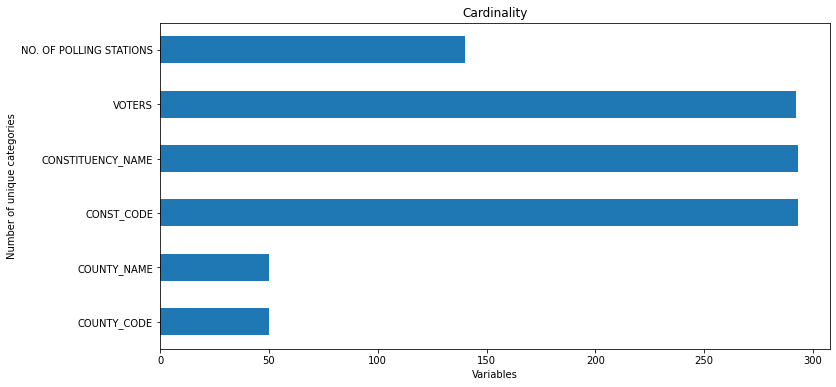

In [19]:
# plot the cardinality:

voters.nunique().plot.barh(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [64]:
# check the count of features/ non-null values in each column -> 

voters.count()

COUNTY_CODE                293
COUNTY_NAME                293
CONST_CODE                 293
CONSTITUENCY_NAME          293
VOTERS                     293
NO. OF POLLING STATIONS    293
dtype: int64

In [65]:
# convert to numerical columns, ---- VOTERS,	NO. OF POLLING STATIONS

voters['VOTERS'] = pd.to_numeric(voters['VOTERS'], errors='coerce')
voters['NO. OF POLLING STATIONS'] = pd.to_numeric(voters['NO. OF POLLING STATIONS'], errors='coerce')
voters['CONST_CODE'] = pd.to_numeric(voters['CONST_CODE'], errors='coerce')
voters['COUNTY_CODE'] = pd.to_numeric(voters['COUNTY_CODE'], errors='coerce')

In [66]:
# display categorical features/columns -> 

categorical_columns = voters.select_dtypes(include=[np.object0]).columns

categorical_columns

Index(['COUNTY_NAME', 'CONSTITUENCY_NAME'], dtype='object')

In [67]:
# display numerical features/columns -> 

numerical_columns = voters.select_dtypes(include=[np.number]).columns

numerical_columns

Index(['COUNTY_CODE', 'CONST_CODE', 'VOTERS', 'NO. OF POLLING STATIONS'], dtype='object')

In [68]:
# check for duplicate rows in the dataset -> 

voters.duplicated().sum()

0

In [69]:
# check missing values -> 

voters.isnull().sum()

COUNTY_CODE                1
COUNTY_NAME                0
CONST_CODE                 1
CONSTITUENCY_NAME          0
VOTERS                     1
NO. OF POLLING STATIONS    1
dtype: int64

In [70]:
# print names or check all columns which have null values ->

[val for val in voters.columns if voters[val].isnull().sum() > 0]

['COUNTY_CODE', 'CONST_CODE', 'VOTERS', 'NO. OF POLLING STATIONS']

In [71]:
# print the percentage of missing values -> 

mask = voters.isnull()

total = mask.sum()

percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',keys=['count_missing', 'percentage_missing (%)'])

missing_data.sort_values(by='percentage_missing (%)', ascending=False,inplace=True)

missing_data

,count_missing,percentage_missing (%)
COUNTY_CODE,1,0.341297
CONST_CODE,1,0.341297
VOTERS,1,0.341297
NO. OF POLLING STATIONS,1,0.341297
COUNTY_NAME,0,0.000000
CONSTITUENCY_NAME,0,0.000000


In [72]:
# print the nullable columns -> 

nullable_columns = voters.columns[mask.any()].tolist()

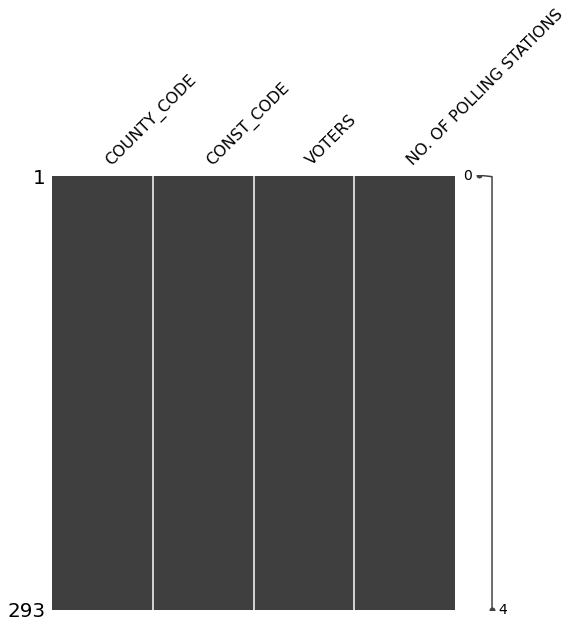

In [73]:
# use `missingno` libraries to plot the matrix and heatmap of nullable columns

msno.matrix(voters[nullable_columns], figsize=(8,8))

plt.show()

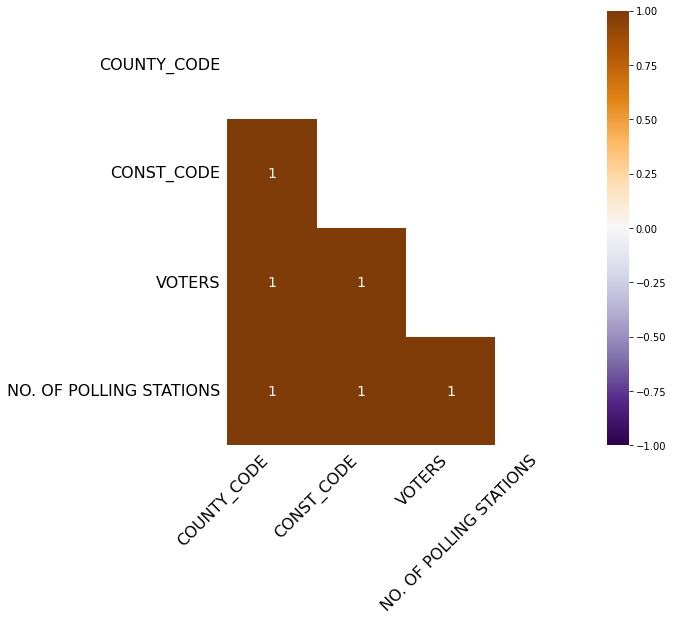

In [74]:
msno.heatmap(voters[nullable_columns], figsize=(8,8), cmap='PuOr_r')

plt.show()

<AxesSubplot:>

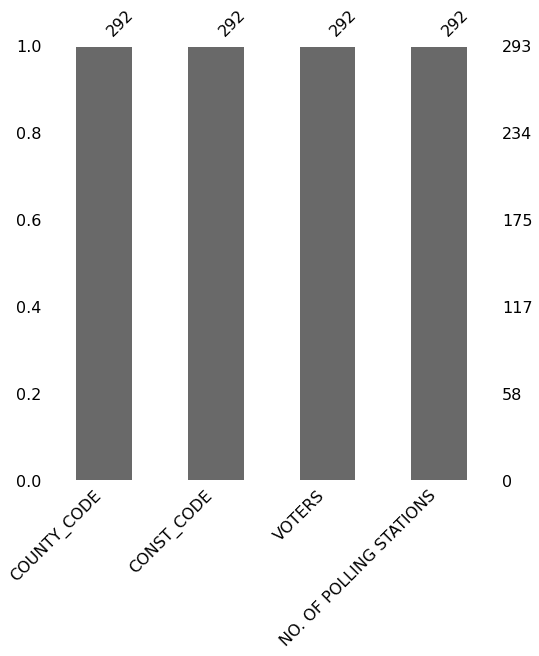

In [75]:
msno.bar(voters[nullable_columns], figsize=(8,8))

In [199]:
# convert to integer.

voters['VOTERS'] = voters['VOTERS'].astype(int)
voters['NO. OF POLLING STATIONS'] = voters['NO. OF POLLING STATIONS'].astype(int)
voters['COUNTY_CODE'] = voters['COUNTY_CODE'].astype(int)
voters['CONST_CODE'] = voters['CONST_CODE'].astype(int)

In [78]:
voters.dropna(inplace=True)

In [79]:
voters.isna().sum().sum()

0

`End of Part 1`

=================================

In [187]:
voters.head()

,COUNTY_CODE,COUNTY_NAME,CONST_CODE,CONSTITUENCY_NAME,VOTERS,NO. OF POLLING STATIONS
1,1.0,MOMBASA,1.0,CHANGAMWE,86331,136
2,1.0,MOMBASA,2.0,JOMVU,69307,109
3,1.0,MOMBASA,3.0,KISAUNI,126151,198
4,1.0,MOMBASA,4.0,NYALI,104017,165
5,1.0,MOMBASA,5.0,LIKONI,87326,140


In [88]:
voters.COUNTY_NAME.nunique()

49

In [85]:
voters.COUNTY_NAME.unique()

array(['MOMBASA', 'KWALE', 'KILIFI', 'TANA RIVER', 'LAMU', 'TAITA TAVETA',
       'GARISSA', 'WAJIR', 'MANDERA', 'MARSABIT', 'ISIOLO', 'MERU',
       'THARAKA - NITHI', 'EMBU', 'KITUI', 'MACHAKOS', 'MAKUENI',
       'NYANDARUA', 'NYERI', 'KIRINYAGA', "MURANG'A", 'KIAMBU', 'TURKANA',
       'WEST POKOT', 'SAMBURU', 'TRANS NZOIA', 'UASIN GISHU',
       'ELGEYO/MARAKWET', 'NANDI', 'BARINGO', 'LAIKIPIA', 'NAKURU',
       'NAROK', 'KAJIADO', 'KERICHO', 'BOMET', 'KAKAMEGA', 'VIHIGA',
       'BUNGOMA', 'BUSIA', 'SIAYA', 'KISUMU', 'HOMA BAY', 'MIGORI',
       'KISII', 'NYAMIRA', 'NAIROBI CITY', 'DIASPORA', 'PRISONS'],
      dtype=object)

In [94]:
vpc = voters.COUNTY_NAME.value_counts().reset_index()
vpc.rename(columns={'index':'County', 'COUNTY_NAME':'Number of Constituencies'}, inplace=True)
vpc

,County,Number of Constituencies
0,NAIROBI CITY,17
1,KAKAMEGA,12
2,KIAMBU,12
3,NAKURU,11
4,KISII,9
5,MERU,9
6,BUNGOMA,9
7,MACHAKOS,8
8,KITUI,8
9,HOMA BAY,8


In [108]:
px.bar(voters.COUNTY_NAME.value_counts(), color_discrete_sequence=['#771933'])

In [148]:
px.violin(voters, y=voters.COUNTY_NAME.value_counts(), box=True, points='all', color_discrete_sequence=['yellowgreen'])

=========================

In [204]:
voters.sample(n=2)

,COUNTY_CODE,COUNTY_NAME,CONST_CODE,CONSTITUENCY_NAME,VOTERS,NO. OF POLLING STATIONS
92,18,NYANDARUA,92,OL JOROK,54770,102
119,22,KIAMBU,119,KABETE,85446,139


In [188]:
cnv = voters.groupby('CONSTITUENCY_NAME')[['VOTERS']].sum().reset_index()
cnv

,CONSTITUENCY_NAME,VOTERS
0,AINABKOI,54797
1,AINAMOI,75521
2,ALDAI,65866
3,ALEGO USONGA,103334
4,AWENDO,48293
...,...,...
287,WEBUYE WEST,50466
288,WEST MUGIRANGO,76392
289,WESTLANDS,152718
290,WUNDANYI,29911


In [203]:
px.line(voters, y='VOTERS', x='CONSTITUENCY_NAME', color_discrete_sequence=['green'])

In [227]:
px.density_heatmap(voters, y='VOTERS', x='CONSTITUENCY_NAME', z='COUNTY_CODE', color_continuous_scale='viridis')

==========

In [205]:
voters.sample(n=1)

,COUNTY_CODE,COUNTY_NAME,CONST_CODE,CONSTITUENCY_NAME,VOTERS,NO. OF POLLING STATIONS
292,49,PRISONS,292,PRISONS,5528,103


In [211]:
vpx = voters.groupby(['COUNTY_NAME','CONSTITUENCY_NAME'])['NO. OF POLLING STATIONS'].sum().reset_index()
vpx

,COUNTY_NAME,CONSTITUENCY_NAME,NO. OF POLLING STATIONS
0,BARINGO,BARINGO NORTH,173
1,BARINGO,BARINGO CENTRAL,135
2,BARINGO,BARINGO SOUTH,132
3,BARINGO,ELDAMA RAVINE,154
4,BARINGO,MOGOTIO,155
...,...,...,...
287,WAJIR,WAJIR WEST,75
288,WEST POKOT,KACHELIBA,187
289,WEST POKOT,KAPENGURIA,194
290,WEST POKOT,POKOT SOUTH,205


In [212]:
px.line(voters, x='CONSTITUENCY_NAME', y='NO. OF POLLING STATIONS')

=====

In [213]:
voters.sample(n=2)

,COUNTY_CODE,COUNTY_NAME,CONST_CODE,CONSTITUENCY_NAME,VOTERS,NO. OF POLLING STATIONS
14,3,KILIFI,14,RABAI,50332,93
147,28,ELGEYO/MARAKWET,147,MARAKWET EAST,36428,142


In [243]:
voter_CONSTITUENCY_name = voters.CONSTITUENCY_NAME.unique().tolist()
voter_CONSTITUENCY_name.sort()
voter_CONSTITUENCY_name.insert(0, 'Overall')
voter_CONSTITUENCY_name

['Overall',
 'AINABKOI',
 'AINAMOI',
 'ALDAI',
 'ALEGO USONGA',
 'AWENDO',
 'BAHATI',
 'BALAMBALA',
 'BANISSA',
 'BARINGO  NORTH',
 'BARINGO CENTRAL',
 'BARINGO SOUTH',
 'BELGUT',
 'BOBASI',
 'BOMACHOGE BORABU',
 'BOMACHOGE CHACHE',
 'BOMET CENTRAL',
 'BOMET EAST',
 'BONCHARI',
 'BONDO',
 'BORABU',
 'BUDALANGI',
 'BUMULA',
 'BURA',
 'BURETI',
 'BUTERE',
 'BUTULA',
 'BUURI',
 'CENTRAL IMENTI',
 'CHANGAMWE',
 'CHEPALUNGU',
 'CHERANGANY',
 'CHESUMEI',
 "CHUKA/IGAMBANG'OMBE",
 'DADAAB',
 'DAGORETTI NORTH',
 'DAGORETTI SOUTH',
 'DIASPORA',
 'ELDAMA RAVINE',
 'ELDAS',
 'EMBAKASI CENTRAL',
 'EMBAKASI EAST',
 'EMBAKASI NORTH',
 'EMBAKASI SOUTH',
 'EMBAKASI WEST',
 'EMGWEN',
 'EMUHAYA',
 'EMURUA DIKIRR',
 'ENDEBESS',
 'FAFI',
 'FUNYULA',
 'GALOLE',
 'GANZE',
 'GARISSA TOWNSHIP',
 'GARSEN',
 'GATANGA',
 'GATUNDU NORTH',
 'GATUNDU SOUTH',
 'GEM',
 'GICHUGU',
 'GILGIL',
 'GITHUNGURI',
 'HAMISI',
 'HOMA BAY TOWN',
 'IGEMBE CENTRAL',
 'IGEMBE NORTH',
 'IGEMBE SOUTH',
 'IJARA',
 'IKOLOMANI',
 'ISIOLO

In [244]:
voter_county_name = voters.COUNTY_NAME.unique().tolist()
voter_county_name.sort()
voter_county_name.insert(0, 'Overall')
voter_county_name

['Overall',
 'BARINGO',
 'BOMET',
 'BUNGOMA',
 'BUSIA',
 'DIASPORA',
 'ELGEYO/MARAKWET',
 'EMBU',
 'GARISSA',
 'HOMA BAY',
 'ISIOLO',
 'KAJIADO',
 'KAKAMEGA',
 'KERICHO',
 'KIAMBU',
 'KILIFI',
 'KIRINYAGA',
 'KISII',
 'KISUMU',
 'KITUI',
 'KWALE',
 'LAIKIPIA',
 'LAMU',
 'MACHAKOS',
 'MAKUENI',
 'MANDERA',
 'MARSABIT',
 'MERU',
 'MIGORI',
 'MOMBASA',
 "MURANG'A",
 'NAIROBI CITY',
 'NAKURU',
 'NANDI',
 'NAROK',
 'NYAMIRA',
 'NYANDARUA',
 'NYERI',
 'PRISONS',
 'SAMBURU',
 'SIAYA',
 'TAITA TAVETA',
 'TANA RIVER',
 'THARAKA - NITHI',
 'TRANS NZOIA',
 'TURKANA',
 'UASIN GISHU',
 'VIHIGA',
 'WAJIR',
 'WEST POKOT']